In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%unload_ext google.colab.data_table

path = "/content/drive/Shareddrives/E-Commerce Project/ml-100k/ml-100k/"

df_data = pd.read_csv(path +'u.data', index_col=False, encoding = "ISO-8859-1" , delimiter='\t', names=['User id', 'Item id', 'Rating', 'Timestamp'])
df_train = pd.read_csv(path + 'u1.base', index_col=False, encoding = "ISO-8859-1" , delimiter='\t', names=['User id', 'Item id', 'Rating', 'Timestamp'])
df_test = pd.read_csv(path+'u1.test',index_col=False, encoding = "ISO-8859-1",delimiter='\t', names=['User id', 'Item id', 'Rating', 'Timestamp'])
df_user_info = pd.read_csv(path + 'u.user', delimiter='|', names=['User id', 'Age', 'Gender', 'Occupation', 'Zip code'])
df_items = pd.read_csv(path + 'u.item', sep='|', names=['Item id', 'Movie title', 'Release date', 'Video release date','IMDb URL', 'Unknown', 'Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama','Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')
df_items.index = df_items.index +1

# add the movie_title column to all the data
df_data = pd.merge(df_data, df_items[['Item id', 'Movie title']])


The google.colab.data_table extension is not loaded.


# Question 1

## Part A

In [86]:
def get_average_rating(df_data):
    # sum and count itemid
    ItemCount = (df_data.groupby('Item id').size())
    ItemRating = (df_data.groupby('Item id').sum())

    # rename column
    ItemCount.name = "Item count"

    # merge and get avg rating
    df = pd.concat((ItemRating,ItemCount), axis=1)

    #compute the Average rating for every movie
    df["Average rating"] = df["Rating"] / df["Item count"]
    df = df.drop(['User id','Timestamp'], axis=1)
    return df


In [87]:
def create_plot(dataframe,plot_title, x_label, y_label,hist_title):

  # create an histogram for the average ratings distribution
  plt.hist(dataframe['Average rating'],rwidth=0.95, bins=[1.0,1.5, 2.0,2.5, 3.0,3.5, 4.0,4.5, 5.0],color='skyblue')
  plt.title(hist_title, fontsize=15)
  plt.xlabel(x_label, fontsize=12)
  plt.ylabel(y_label, fontsize=12)
  plt.show()

In [88]:
# import movies names
def get_top_3_movies_names_and_rating(df,title):

  # merge so we have movie name and not only id
  df = df.sort_values(by=['Average rating','Item count'],ascending=False).head(3)

  print(title)
  return df[['Movie title','Average rating']]

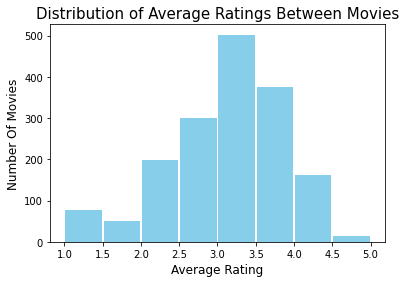

In [89]:
# call to get_average_rating function to get the Average rating for every movie
df_item_count_avg_rating = get_average_rating(df_data)

# merge with the movies data to get the all information
df_item_count_avg_rating = pd.merge(df_item_count_avg_rating, df_items[['Item id', 'Movie title']], on='Item id')

df_item_count_avg_rating.index = df_item_count_avg_rating.index +1

# sort the data in the dataframe by the values of Average rating
df_item_count_avg_rating = df_item_count_avg_rating.sort_values(by=['Average rating','Item count'],ascending=False)

# create an histogram for the average ratings distribution
create_plot(df_item_count_avg_rating,"Average Rating","Average Rating","Number Of Movies","Distribution of Average Ratings Between Movies")


**Display top 3 movies with the highest rating average**

In [90]:
# get the top 3 movies with the highest Average rating
top_3_movies = get_top_3_movies_names_and_rating(df_item_count_avg_rating,"Top 3 Movies by Avera ge Rating:")
display(top_3_movies)

Top 3 Movies by Avera ge Rating:


,Movie title,Average rating
1189,Prefontaine (1997),5.0
1293,Star Kid (1997),5.0
1467,"Saint of Fort Washington, The (1993)",5.0


## Part B

In [91]:
df_data_gender = pd.merge(df_data,df_user_info)

# get only the information for the females
df_females = df_data_gender.loc[df_data_gender.Gender=='F']

# get only the information for the males
df_males = df_data_gender.loc[df_data_gender.Gender=='M']

# get the avrege rating for each dataframe
df_item_count_avg_rating_females = get_average_rating(df_females)
df_item_count_avg_rating_males = get_average_rating(df_males)


def get_average_rating_by_gender(df_data_gender):
  df_females = df_data_gender.loc[df_data_gender.Gender=='F']
  df_males = df_data_gender.loc[df_data_gender.Gender=='M']

  # groupby the Item id and Movie titele to get all the necessary data
  df_females = df_females.groupby(['Item id','Movie title']).mean()
  df_males = df_males.groupby(['Item id','Movie title']).mean()

  # merge male and female with movie dataframe
  df_item_count_females = df_item_count_avg_rating_females.merge(df_items[['Item id','Movie title']] ,on='Item id')
  df_item_count_females.index = df_item_count_females.index +1

  df_item_count_males = df_item_count_avg_rating_males.merge(df_items[['Item id','Movie title']] ,on='Item id')
  df_item_count_males.index = df_item_count_males.index +1

  return df_item_count_females, df_item_count_males

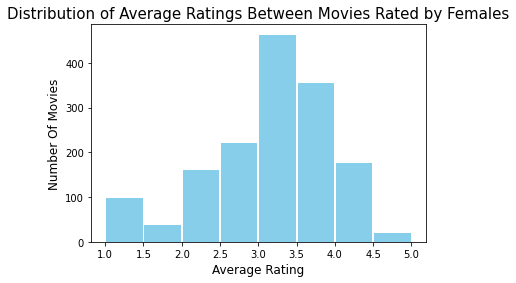

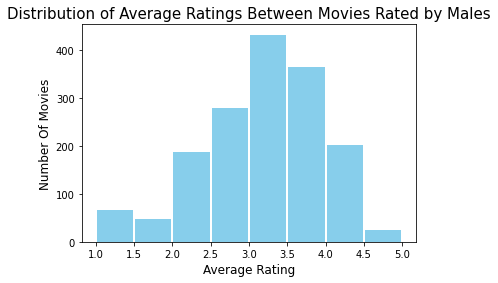

Top 3 Movies Average Rating For Females:


,Movie title,Average rating
1303,Mina Tannenbaum (1994),5.0
74,Faster Pussycat! Kill! Kill! (1965),5.0
118,Maya Lin: A Strong Clear Vision (1994),5.0


Top 3 Movies Average Rating For Males:


,Movie title,Average rating
1291,Star Kid (1997),5.0
1173,Hugo Pool (1997),5.0
1187,Prefontaine (1997),5.0


In [92]:
# call get_average_rating_by_gender function to compute all the data 
df_females, df_males = get_average_rating_by_gender(df_data_gender)

# create an histogram for the average ratings distribution
create_plot(df_females, "Average Rating for Females", "Average Rating","Number Of Movies","Distribution of Average Ratings Between Movies Rated by Females")
create_plot(df_males, "Average Rating for Males", "Average Rating","Number Of Movies","Distribution of Average Ratings Between Movies Rated by Males")

# get the top 3 movies with the highest Average rating
top_3_movies_females = get_top_3_movies_names_and_rating(df_females,"Top 3 Movies Average Rating For Females:")
display(top_3_movies_females)

top_3_movies_males = get_top_3_movies_names_and_rating(df_males,"Top 3 Movies Average Rating For Males:")
display(top_3_movies_males)

In [93]:
# calculate the diffrence 
# get top 3 for max difference between gender ranking

diffrence = pd.merge(df_females, df_males, how='right', on="Movie title", suffixes=('_female', "_male"))

# compute the diffrence
diffrence['Average rating'] = abs((diffrence['Average rating_male']-diffrence['Average rating_female']))

# sort the data by the value of Average rating
top_3_movies_diffrence = diffrence.sort_values(by=['Average rating'],ascending=False).head(3)

# show the Average rating for females, males and the diffrense
display(top_3_movies_diffrence[['Average rating_female','Average rating_male','Average rating']])

# show the top 3 movies with the highest diffrence Average rating
print("Top 3 Movies Max Difference Average Rating Between Females and Males:")
top_3_movies_diffrence = top_3_movies_diffrence[['Movie title','Average rating']]
display(top_3_movies_diffrence)


,Average rating_female,Average rating_male,Average rating
1327,1.0,5.000000,4.000000
867,1.0,4.666667,3.666667
1453,1.0,4.500000,3.500000


Top 3 Movies Max Difference Average Rating Between Females and Males:


,Movie title,Average rating
1327,Delta of Venus (1994),4.000000
867,Two or Three Things I Know About Her (1966),3.666667
1453,Sliding Doors (1998),3.500000


## Part C

We examined the category (genre) distribution of the 100 films with the highest rating and the 100 films with the lowest rating
For different populations.

The populations we examined are:

*   The general population
*   Females
*   Males
*   Age 30 and under
*   Over the age of 30 

In [94]:
df_data_age = pd.merge(df_data,df_user_info)

# get only the information for the under 30
df_under_30_and_30 = df_data_age.loc[df_data_age.Age<=30]

# get only the information for the over 30
df_over_30 = df_data_age.loc[df_data_age.Age>30]

# get the avrege rating for each dataframe
df_item_count_avg_rating_under_30 = get_average_rating(df_under_30_and_30)
df_item_count_avg_rating_over_30 = get_average_rating(df_over_30)

def get_average_rating_by_age(df_data_age):
  df_under_30_and_30 = df_data_age.loc[df_data_age.Age<=30]
  df_over_30 = df_data_age.loc[df_data_age.Age>30]

  # groupby the Item id and Movie titele to get all the necessary data
  df_under_30_and_30 = df_under_30_and_30.groupby(['Item id','Movie title']).mean()
  df_over_30 = df_over_30.groupby(['Item id','Movie title']).mean()

  # merge over 30 and under 30 with movie dataframe
  df_item_count_under_30 = df_item_count_avg_rating_under_30.merge(df_items[['Item id','Movie title']] ,on='Item id')
  df_item_count_under_30.index = df_item_count_under_30.index +1

  df_item_count_over_30 = df_item_count_avg_rating_over_30.merge(df_items[['Item id','Movie title']] ,on='Item id')
  df_item_count_over_30.index = df_item_count_over_30.index +1


  return df_item_count_under_30, df_item_count_over_30


df_under_30_and_30, df_over_30 = get_average_rating_by_age(df_data_age)

In [95]:
# merge male and female with movie dataframe
df_females = df_data_gender.loc[df_data_gender.Gender=='F']
df_males = df_data_gender.loc[df_data_gender.Gender=='M']

df_females = df_females.merge(df_items)
df_males = df_males.merge(df_items)


# merge under 30 and over 30 with movie dataframe
df_under_30_and_30 = df_data_age.loc[df_data_age.Age<=30]
df_over_30 = df_data_age.loc[df_data_age.Age>30]

df_under_30_and_30 = df_under_30_and_30.merge(df_items)
df_over_30 = df_over_30.merge(df_items)

# the list of all geners
list_of_genre = ['Unknown','Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# merge all data with movie dataframe
df_movies = df_data.merge(df_items)

In [96]:
# calculate the mean of Rating for each dataframe

df_under_30_and_30 = df_under_30_and_30.groupby('Movie title').mean()
df_over_30 = df_over_30.groupby('Movie title').mean()
df_females = df_females.groupby('Movie title').mean()
df_males = df_males.groupby('Movie title').mean()
df_movies = df_movies.groupby('Movie title').mean()

# sort all dataframe by the value Rating
df_under_30_and_30 = df_under_30_and_30.sort_values(by='Rating',ascending=False, inplace=False)
df_over_30 = df_over_30.sort_values(by='Rating',ascending=False, inplace=False)
df_females = df_females.sort_values(by='Rating',ascending=False, inplace=False)
df_males = df_males.sort_values(by='Rating',ascending=False, inplace=False)
df_movies = df_movies.sort_values(by='Rating',ascending=False, inplace=False)


In [97]:
"""count the amount of movies in each gener
take the head or tail of the dataframe if we need to compute the top movies or the bottom movies
return a dataframe that is ready to show by histogram"""

def categoryCountDF(df_movies_to_check,top_or_bottom):
    # check if it is top or bottom
    if top_or_bottom == 'top':
        df_movies_to_check = (df_movies_to_check.head(100))
    else:
        df_movies_to_check = (df_movies_to_check.tail(100))
    
    # get the gener list, count the movies in each gener
    df_movies_to_check=df_movies_to_check[list_of_genre]
    df_movies_to_check.loc['Total'] = df_movies_to_check.sum(axis=0)
    # add it at the last row
    df_movies_to_check=df_movies_to_check.iloc[-1]
 
    df_movies_to_check=pd.DataFrame({'Genre': df_movies_to_check.index, 'Count': df_movies_to_check.values})
    return df_movies_to_check.sort_values(by='Count',ascending=False)


In [98]:
# take the top 100 and keep only Genres for each dataframe of specific population

# all data
df_movies_Top100 = categoryCountDF(df_movies,'top')
df_movies_Bottom100 = categoryCountDF(df_movies,'bottom')

# only females
df_female_movies_Top100= categoryCountDF(df_females,'top')
df_female_movies_Bottom100 = categoryCountDF(df_females,'bottom')

# only males
df_male_movies_Top100 = categoryCountDF(df_males,'top')
df_male_movies_Bottom100 = categoryCountDF(df_males,'bottom')

# only under 30 and 30
df_under_30_movies_Top100 = categoryCountDF(df_under_30_and_30,'top')
df_under_30_movies_Bottom100 = categoryCountDF(df_under_30_and_30,'bottom')

# only over 30
df_over_30_movies_Top100 = categoryCountDF(df_over_30,'top')
df_over_30_movies_Bottom100 = categoryCountDF(df_over_30,'bottom')

In [99]:
# create histogram for every dataframe of specific population
def create_plot_and_display(df_to_show,title):
    df_to_show.columns = ['Genre', 'Count']
    plt.title(title)
    plt.xlabel('Genre Name')
    plt.ylabel('Total Movies In This Genre')
    y = df_to_show['Count']
    x = df_to_show['Genre']
    plt.bar(x, y, label='Bar', align='center')
    plt.xticks(x,rotation=-90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    display(df_to_show)

**category distribution for different populations**

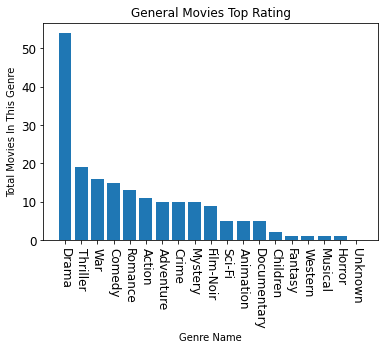

,Genre,Count
8,Drama,54.0
16,Thriller,19.0
17,War,16.0
5,Comedy,15.0
14,Romance,13.0
1,Action,11.0
2,Adventure,10.0
6,Crime,10.0
13,Mystery,10.0
10,Film-Noir,9.0


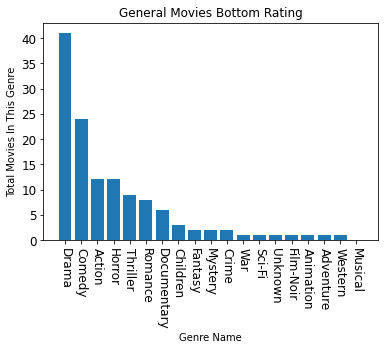

,Genre,Count
8,Drama,41.0
5,Comedy,24.0
1,Action,12.0
11,Horror,12.0
16,Thriller,9.0
14,Romance,8.0
7,Documentary,6.0
4,Children,3.0
9,Fantasy,2.0
13,Mystery,2.0


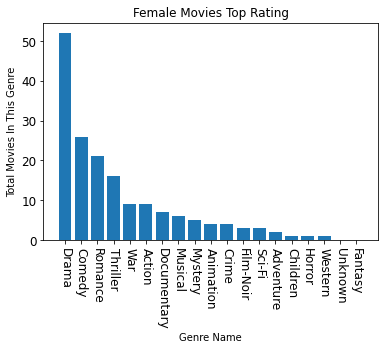

,Genre,Count
8,Drama,52.0
5,Comedy,26.0
14,Romance,21.0
16,Thriller,16.0
17,War,9.0
1,Action,9.0
7,Documentary,7.0
12,Musical,6.0
13,Mystery,5.0
3,Animation,4.0


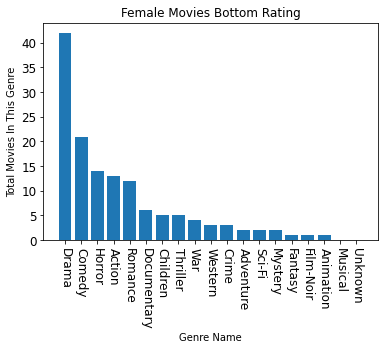

,Genre,Count
8,Drama,42.0
5,Comedy,21.0
11,Horror,14.0
1,Action,13.0
14,Romance,12.0
7,Documentary,6.0
4,Children,5.0
16,Thriller,5.0
17,War,4.0
18,Western,3.0


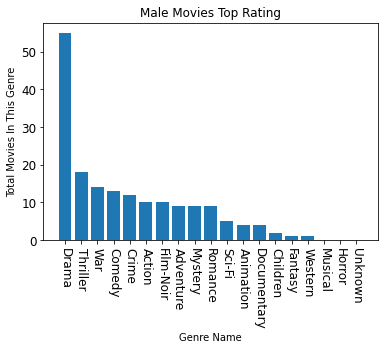

,Genre,Count
8,Drama,55.0
16,Thriller,18.0
17,War,14.0
5,Comedy,13.0
6,Crime,12.0
1,Action,10.0
10,Film-Noir,10.0
2,Adventure,9.0
13,Mystery,9.0
14,Romance,9.0


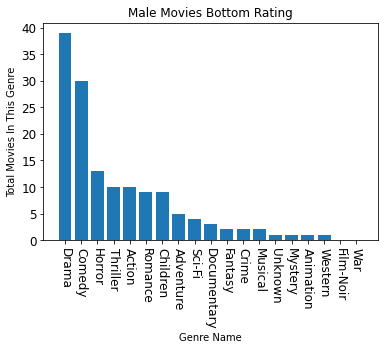

,Genre,Count
8,Drama,39.0
5,Comedy,30.0
11,Horror,13.0
16,Thriller,10.0
1,Action,10.0
14,Romance,9.0
4,Children,9.0
2,Adventure,5.0
15,Sci-Fi,4.0
7,Documentary,3.0


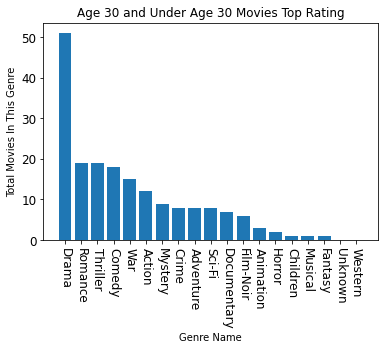

,Genre,Count
8,Drama,51.0
14,Romance,19.0
16,Thriller,19.0
5,Comedy,18.0
17,War,15.0
1,Action,12.0
13,Mystery,9.0
6,Crime,8.0
2,Adventure,8.0
15,Sci-Fi,8.0


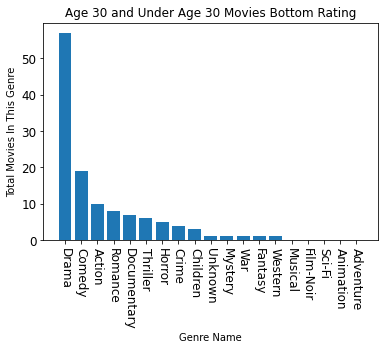

,Genre,Count
8,Drama,57.0
5,Comedy,19.0
1,Action,10.0
14,Romance,8.0
7,Documentary,7.0
16,Thriller,6.0
11,Horror,5.0
6,Crime,4.0
4,Children,3.0
0,Unknown,1.0


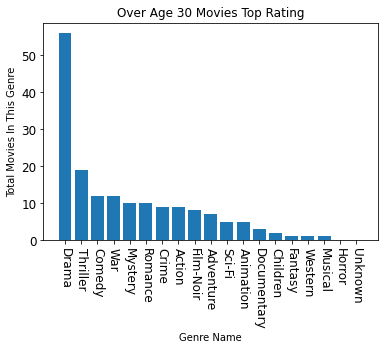

,Genre,Count
8,Drama,56.0
16,Thriller,19.0
5,Comedy,12.0
17,War,12.0
13,Mystery,10.0
14,Romance,10.0
6,Crime,9.0
1,Action,9.0
10,Film-Noir,8.0
2,Adventure,7.0


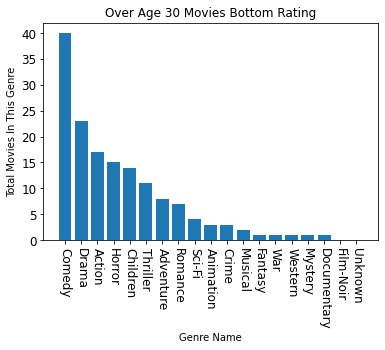

,Genre,Count
5,Comedy,40.0
8,Drama,23.0
1,Action,17.0
11,Horror,15.0
4,Children,14.0
16,Thriller,11.0
2,Adventure,8.0
14,Romance,7.0
15,Sci-Fi,4.0
3,Animation,3.0


In [100]:
# create and show histogram for all data top 100 and bottom 100
create_plot_and_display(df_movies_Top100,'General Movies Top Rating')
create_plot_and_display(df_movies_Bottom100,'General Movies Bottom Rating')

# create and show histogram foronly females top 100 and bottom 100
create_plot_and_display(df_female_movies_Top100,'Female Movies Top Rating')
create_plot_and_display(df_female_movies_Bottom100,'Female Movies Bottom Rating')

# create and show histogram for only males top 100 and bottom 100
create_plot_and_display(df_male_movies_Top100,'Male Movies Top Rating')
create_plot_and_display(df_male_movies_Bottom100,'Male Movies Bottom Rating')

# create and show histogram for only under 30 and 30 top 100 and bottom 100
create_plot_and_display(df_under_30_movies_Top100,'Age 30 and Under Age 30 Movies Top Rating')
create_plot_and_display(df_under_30_movies_Bottom100,'Age 30 and Under Age 30 Movies Bottom Rating')

# create and show histogram for only over 30 top 100 and bottom 100
create_plot_and_display(df_over_30_movies_Top100,'Over Age 30 Movies Top Rating')
create_plot_and_display(df_over_30_movies_Bottom100,'Over Age 30 Movies Bottom Rating')



## Part D

**Top 10 Popular Movies:**

In [101]:
df_sorted_by_number_of_ratings = df_item_count_avg_rating.sort_values(by=['Item count','Average rating'],ascending=False)

# take the dataframe that as the full data after the Average rating compute
# sort this dataframe by the value of Item count and then sort by the value of Average rating
# take the top 50
top_item_count = df_item_count_avg_rating.sort_values(by=['Item count','Average rating'],ascending=False).head(50)

# sort the top 50  dataframe by the value of Average rating and then sort by the value of Item count
# take the top 30
top_avg_rating = top_item_count.sort_values(by=['Average rating','Item count'],ascending=False).head(30)

# sort the top 30 dataframe by the value of Item count and then sort by the value of Average rating
# take the top 20
top_item_count = top_avg_rating.sort_values(by=['Item count','Average rating'],ascending=False).head(20)

# sort the top 20  dataframe by the value of Average rating and then sort by the value of Item count
# take the top 10
top_avg_rating = top_item_count.sort_values(by=['Average rating','Item count'],ascending=False).head(10)

display(top_avg_rating[["Movie title","Average rating","Item count"]])


,Movie title,Average rating,Item count
50,Star Wars (1977),4.358491,583
98,"Silence of the Lambs, The (1991)",4.289744,390
127,"Godfather, The (1972)",4.283293,413
174,Raiders of the Lost Ark (1981),4.252381,420
313,Titanic (1997),4.245714,350
172,"Empire Strikes Back, The (1980)",4.204360,367
173,"Princess Bride, The (1987)",4.172840,324
100,Fargo (1996),4.155512,508
168,Monty Python and the Holy Grail (1974),4.066456,316
56,Pulp Fiction (1994),4.060914,394


## Part E

**clacluate sparsity**

In [102]:
# amount of moveis rating reviews
reviewCount = len(df_data)

# amount of movies
ItemCount = len((df_data.groupby('Item id')))  

# amount of users
UserCount = len((df_data.groupby('User id')))

# multipul amount of movies with amount of users
Max_option_for_rating = ItemCount * UserCount

# amount of moveis rating reviews divided by Max_option_for_rating
sparsity = reviewCount/Max_option_for_rating
display(sparsity)

0.06304669364224531

**calculate number of average ratings for user**

In [103]:
# amount of moveis rating reviews divided by amount of users
num_of_avg_ratings = reviewCount/UserCount
print(round(num_of_avg_ratings))

106


# Question 2

## Part A


In [104]:
from sklearn.preprocessing import LabelEncoder

# convert values to float
def convert_to_float(df, str):
    enc = LabelEncoder()
    enc.fit(df[str])
    return enc.transform(df[str])

# normalize values
def normalize(df):
    df.set_index(['Item id'], inplace=True)
    min = df['Average rating'].min()
    max = df['Average rating'].max()
    df=5*(df-min)/(max-min)
    return df

In [105]:
# merge two dataframes and sort the new dataframe 
# sort the dataframe by value Item id
def merge_dataframes_for_train(df_sort , sort_value , df_merge):

  df_avg_ratings = df_sort.sort_values(by=sort_value, ascending=True,inplace=False)
  df_features_and_avg_ratings = pd.merge(df_avg_ratings,df_merge)
  return df_features_and_avg_ratings

# create df for train x and for train y
def create_df_train_x_and_df_train_y(df_features_and_avg_ratings):
  df_train_x = df_features_and_avg_ratings
  df_train_y = df_features_and_avg_ratings[['Item id','Average rating']]
  return df_train_x , df_train_y

# create df for train x and for train y for gender dataframes
def create_df_train_x_and_df_train_y_gender(df_features_and_avg_ratings):
  df_train_x = df_features_and_avg_ratings
  df_train_y = df_features_and_avg_ratings[['Item id','Rating']]
  return df_train_x , df_train_y
 
# merge so we have movie name and not only id
def merge_dataframes_for_test(df_test,df_merg):
  df_test = df_test.merge(df_merg[list(['Item id','Movie title'])], left_index=True, right_on='Item id', how='outer')
  df_test = pd.merge(df_test,df_merg)
  return df_test

# create df for test x and for test y for
def create_df_test_x_and_df_test_y(df_test):
  df_test_x = df_test.drop('Average rating', axis=1, inplace=False).set_index(['Item id'])
  df_test_y = df_test[['Item id','Average rating']].set_index(['Item id'])
  return df_test_x , df_test_y

In [106]:
#do the same process of Question1A to test info
df_test = get_average_rating(df_test)

# merge dataframes and create dataframes for train x and train y
df_features_and_avg_ratings = merge_dataframes_for_train(df_item_count_avg_rating , 'Item id' , df_items)
df_train_x , df_train_y = create_df_train_x_and_df_train_y(df_features_and_avg_ratings)

# merge dataframes and create dataframes for test x and test y
df_test = merge_dataframes_for_test(df_test,df_items)
df_test_x , df_test_y = create_df_test_x_and_df_test_y(df_test)

**Convert all types to float and then build a prediction model**

In [107]:
# convert all types to float and then build a prediction model
df_test_x['Movie title'] = convert_to_float(df_test_x,'Movie title')
df_train_x['Movie title'] = convert_to_float(df_train_x,'Movie title')

**Predict model**

In [108]:
# comput the prediction
df_test_y['prediction'] = df_train_y['Average rating']

# drop Na and Nan valuse
df_test_y = df_test_y.dropna()

**The MAE for the model**

In [109]:
from sklearn.metrics import mean_absolute_error

# calculate the MAE for the model
mae = mean_absolute_error(df_test_y['Average rating'], df_test_y['prediction'])
print("The MAE of the Model: " + str(mae))

The MAE of the Model: 0.6943326091781578


## Part B

**MALE**

In [110]:
# MALE
df_males = df_data_gender.loc[df_data_gender.Gender=='M']
df_males = df_males.merge(df_items)
df_males = df_males.groupby(['Item id','Movie title']).mean()

# #do the same process of Question1A to test info
df_male_test = pd.read_csv(path + 'u1.test',index_col=False, encoding = "ISO-8859-1",delimiter='\t', names=['User id', 'Item id', 'Rating', 'Timestamp'])
df_male_test = get_average_rating(df_male_test)


# merge dataframes and create dataframes for train x and train y
df_male_features_and_avg_ratings = merge_dataframes_for_train(df_males , 'Item id' , df_items)
df_male_x_train , df_male_y_train = create_df_train_x_and_df_train_y_gender(df_male_features_and_avg_ratings)

# merge dataframes and create dataframes for test x and test y
df_male_test = merge_dataframes_for_test(df_male_test,df_items)
df_male_x_test , df_male_y_test = create_df_test_x_and_df_test_y(df_male_test)

**Convert all types to float and then build a prediction model**

In [111]:
# convert all types to float and then build a prediction model
df_male_x_test['Movie title'] = convert_to_float(df_male_x_test,'Movie title')
df_male_x_train['Movie title'] = convert_to_float(df_male_x_train,'Movie title')
df_male_x_train.drop('Age', axis=1, inplace=True)

**Predict model**

In [112]:
# comput the prediction
df_male_y_test['prediction'] = df_male_y_train['Rating']

# drop Na and Nan valuse
df_male_y_test = df_male_y_test.dropna()

**The MAE for the model**

In [113]:
# calculate the MAE for the model
mae = mean_absolute_error(df_male_y_test['Average rating'], df_male_y_test['prediction'])
print("The MAE of the Male Model: " + str(mae))

The MAE of the Male Model: 0.921300684810803


**FEMALE**

In [114]:
# FEMALE
df_females = df_data_gender.loc[df_data_gender.Gender=='F']
df_females = df_females.merge(df_items)

df_females = df_females.groupby(['Item id','Movie title']).mean()

# #do the same process of Question1A to test info
df_female_test = pd.read_csv(path + 'u1.test',index_col=False, encoding = "ISO-8859-1",delimiter='\t', names=['User id', 'Item id', 'Rating', 'Timestamp'])
df_female_test = get_average_rating(df_female_test)


# merge dataframes and create dataframes for train x and train y
df_female_features_and_avg_ratings = merge_dataframes_for_train(df_females , 'Item id' , df_items)
df_female_x_train , df_female_y_train = create_df_train_x_and_df_train_y_gender(df_female_features_and_avg_ratings)

# merge dataframes and create dataframes for test x and test y
df_female_test = merge_dataframes_for_test(df_female_test,df_items)
df_female_x_test , df_female_y_test = create_df_test_x_and_df_test_y(df_female_test)

**Convert all types to float and then build a prediction model**

In [115]:
# convert all types to float and then build a prediction model
df_female_x_test['Movie title'] = convert_to_float(df_female_x_test,'Movie title')
df_female_x_train['Movie title'] = convert_to_float(df_female_x_train,'Movie title')
df_female_x_train.drop('Age', axis=1, inplace=True)

**Predict model**

In [116]:
# comput the prediction
df_female_y_test['prediction'] = df_female_y_train['Rating']

# drop Na and Nan valuse
df_female_y_test = df_female_y_test.dropna()

**The MAE for the model**

In [117]:
# calculate the MAE for the model
mae = mean_absolute_error(df_female_y_test['Average rating'], df_female_y_test['prediction'])
print("The MAE of the Feale Model: " + str(mae))

The MAE of the Feale Model: 0.9246418287385217
